# Face Recogn

In [26]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
import matplotlib.pyplot as plt

In [20]:
args = {
    "dataset" : "dataset/",
    "confidense" : 0.5,
    "encodings" : "encodings.pickle",
    "detection_method" : "hog",
    "image" : "../../Face_Detection/dataset/dp.jpeg"
}

In [21]:
# grab the paths to the input images in our dataset
print("[INFO] quantifying faces...")
imagePaths = list(paths.list_images(args["dataset"]))
 
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

[INFO] quantifying faces...


In [22]:
# Creating 128-D Encoding

In [23]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# extract the person name from the image path
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	name = imagePath.split(os.path.sep)[-2]
 
	# load the input image and convert it from BGR (OpenCV ordering)
	# to dlib ordering (RGB)
	image = cv2.imread(imagePath)
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input image
	boxes = face_recognition.face_locations(rgb,
		model=args["detection_method"])
 
	# compute the facial embedding for the face
	encodings = face_recognition.face_encodings(rgb, boxes)
 
	# loop over the encodings
	for encoding in encodings:
		# add each encoding + name to our set of known names and
		# encodings
		knownEncodings.append(encoding)
		knownNames.append(name)
# dump the facial encodings + names to disk
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open(args["encodings"], "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] processing image 1/9
[INFO] processing image 2/9
[INFO] processing image 3/9
[INFO] processing image 4/9
[INFO] processing image 5/9
[INFO] processing image 6/9
[INFO] processing image 7/9
[INFO] processing image 8/9
[INFO] processing image 9/9
[INFO] serializing encodings...


In [24]:
# Recognize face

[INFO] loading encodings...
[INFO] recognizing faces...


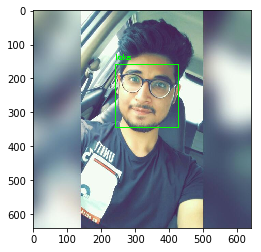

In [28]:

# load the known faces and embeddings
print("[INFO] loading encodings...")
data = pickle.loads(open(args["encodings"], "rb").read())
 
# load the input image and convert it from BGR to RGB
image = cv2.imread(args["image"])
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# detect the (x, y)-coordinates of the bounding boxes corresponding
# to each face in the input image, then compute the facial embeddings
# for each face
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb,
	model=args["detection_method"])
encodings = face_recognition.face_encodings(rgb, boxes)
# initialize the list of names for each face detected
names = []
 
# initialize the list of names for each
for encoding in encodings:
	# attempt to match each face in the input image to our known
	# encodings
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"
    
    # check to see if we have found a match
	if True in matches:
		# find the indexes of all matched faces then initialize a
		# dictionary to count the total number of times each face
		# was matched
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}
 
		# loop over the matched indexes and maintain a count for
		# each recognized face face
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1
 
		# determine the recognized face with the largest number of
		# votes (note: in the event of an unlikely tie Python will
		# select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)
# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
	# draw the predicted face name on the image
	cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
		0.75, (0, 255, 0), 2)
 
# show the output image
# cv2.imshow("Image", image)
# cv2.waitKey(0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)